[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/image_enhancement.ipynb)

# Image Enhancement

In this tutorial we are going to learn how to tweak image properties using the compoments from `kornia.enhance`.

In [ ]:
%%capture
!pip install kornia

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


download_image("https://github.com/kornia/data/raw/main/ninja_turtles.jpg")

'ninja_turtles.jpg'

In [ ]:
import cv2
import kornia as K
import numpy as np
import torch
import torchvision
from matplotlib import pyplot as plt

In [ ]:
def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis("off")
    plt.show()

We use OpenCV to load an image to memory represented in a numpy.ndarray

In [ ]:
img_bgr: np.ndarray = cv2.imread("ninja_turtles.jpg", cv2.IMREAD_COLOR)

Convert the numpy array to torch

In [ ]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)
x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

Create batch and normalize

In [ ]:
x_rgb = x_rgb.expand(4, -1, -1, -1)  # 4xCxHxW
x_rgb = x_rgb.float() / 255.0

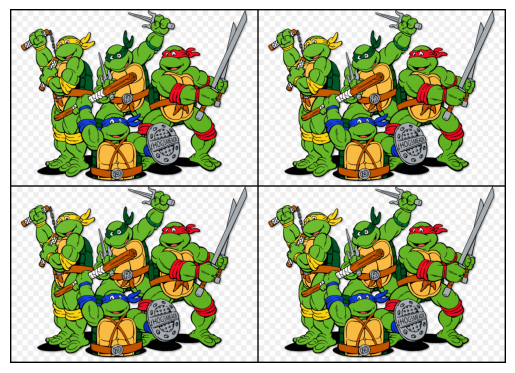

In [ ]:
imshow(x_rgb)

## Adjust brightness

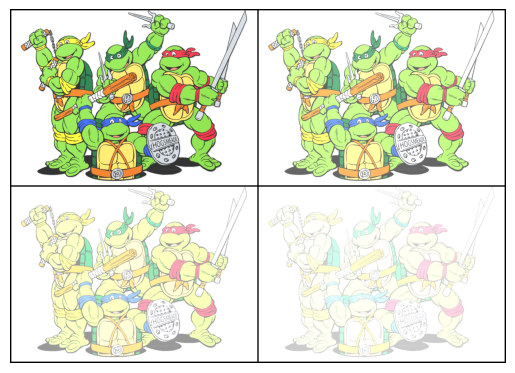

In [ ]:
x_out: torch.Tensor = K.enhance.adjust_brightness(x_rgb, torch.linspace(0.2, 0.8, 4))
imshow(x_out)

## Adjust Contrast

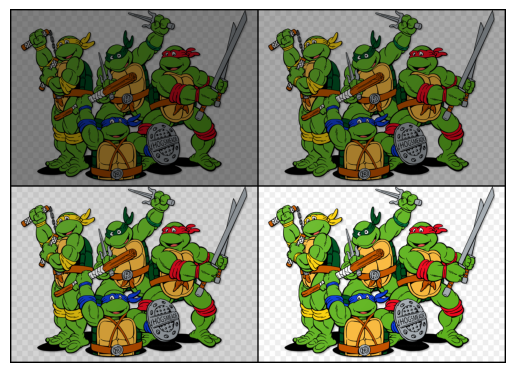

In [ ]:
x_out: torch.Tensor = K.enhance.adjust_contrast(x_rgb, torch.linspace(0.5, 1.0, 4))
imshow(x_out)

## Adjust Saturation

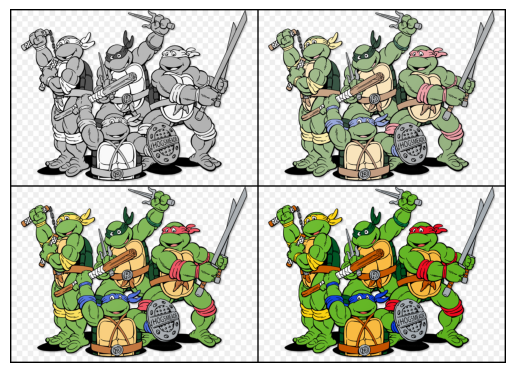

In [ ]:
x_out: torch.Tensor = K.enhance.adjust_saturation(x_rgb, torch.linspace(0.0, 1.0, 4))
imshow(x_out)

## Adjust Gamma

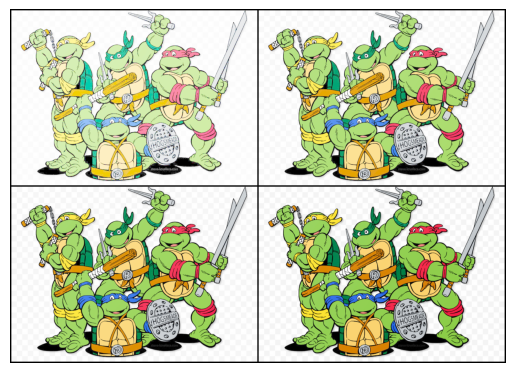

In [ ]:
x_out: torch.Tensor = K.enhance.adjust_gamma(x_rgb, torch.tensor([0.2, 0.4, 0.5, 0.6]))
imshow(x_out)

## Adjust Hue

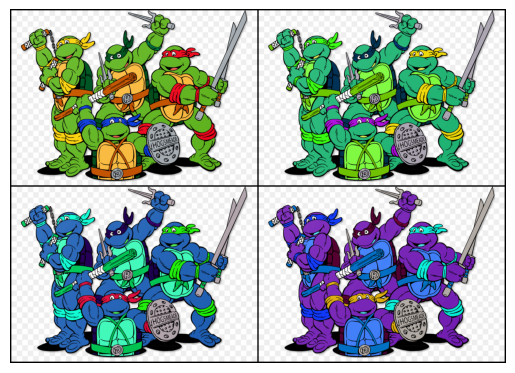

In [ ]:
x_out: torch.Tensor = K.enhance.adjust_hue(x_rgb, torch.linspace(0.0, 3.14159, 4))
imshow(x_out)